In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt
import seaborn as sns # this is used for the plot the graph
import matplotlib
%matplotlib inline
matplotlib.use("Agg")
# used for plot interactive graph. I like it most for plot

In [3]:
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn import tree

In [4]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm    # To import the svm classifier

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [5]:
import random
data = pd.read_csv('pacific.csv')
data.head(6)

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,19490611,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,19490611,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,19490611,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,19490611,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,19490612,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
5,EP011949,UNNAMED,19490612,600,,TS,20.5N,109.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [10]:
#print(data.info())

#data['Status'] = data['Status'].map({'TS':1,'HU':0})

#data.describe() # this will describe the all statistical function of our data

data.Status = pd.Categorical(data.Status)
data['Status'] = data.Status.cat.codes
data.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,19490611,0,,11,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,19490611,600,,11,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,19490611,1200,,11,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,19490611,1800,,11,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,19490612,0,,11,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


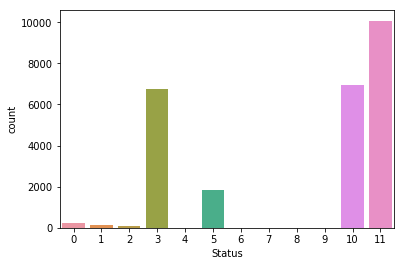

In [11]:
# lets get the frequency of different typhoons
sns.countplot(data['Status'],label="Count")
plt.show()

In [12]:
random.seed(2)
pred_columns = data[:]
pred_columns.drop(['Status'],axis=1,inplace=True)
pred_columns.drop(['Event'],axis=1,inplace=True)
pred_columns.drop(['Latitude'],axis=1,inplace=True)
pred_columns.drop(['Longitude'],axis=1,inplace=True)
pred_columns.drop(['ID'],axis=1,inplace=True)
pred_columns.drop(['Name'],axis=1,inplace=True)
pred_columns.drop(['Date'],axis=1,inplace=True)
pred_columns.drop(['Time'],axis=1,inplace=True)
prediction_var = pred_columns.columns
print(list(prediction_var))

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


['Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']


In [13]:
# now these are the variables which will use for prediction
#now split our data into train and test

train, test = train_test_split(data, test_size = 0.3)# in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

(18295, 22)
(7842, 22)


In [14]:
train_X = train[prediction_var]# taking the training data input
train_y= train['Status']# This is output of our training data
#print(list(data.columns))
print(list(train.columns))

['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude', 'Longitude', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']


In [15]:
# same we have to do for test
test_X= test[prediction_var] # taking test data inputs
test_y =test['Status']   #output value of test dat

In [16]:
#RandomForest classifier
model=RandomForestClassifier(n_estimators=100)# a simple random forest model
model.fit(train_X,train_y)# now fit our model for traiing data
prediction=model.predict(test_X)# predict for the test data
# prediction will contain the predicted value by our model predicted values of diagnosis column for test inputs
print(metrics.accuracy_score(prediction,test_y)) # to check the accuracy
# here we will use accuracy measurement between our predicted value and our test output values

0.9591940831420556


In [17]:
#Decision Tree
model = tree.DecisionTreeClassifier()
model.fit(train_X,train_y)# now fit our model for traiing data
prediction=model.predict(test_X)# predict for the test data
# prediction will contain the predicted value by our model predicted values of diagnosis column for test inputs

In [36]:
print("Accuracy:",accuracy_score(prediction,test_y)) # to check the accuracy
#here we will use accuracy measurement between our predicted value and our test output values

df=pd.DataFrame({"Pridict":prediction, "Actual": test_y})
print("Predicted Vs Acutal:\n",df.head(10))

Accuracy: 0.958301453710788
Predicted Vs Acutal:
        Pridict  Actual
18914       11      11
21712        5       5
10931       11      11
7560        11      11
22431       11      11
1366        11      11
3203        10      10
6803        10      10
19938       11      11
2498        11      11


In [39]:
gnb = GaussianNB()
gnb.fit(train_X, train_y)
y_pred_gnb = gnb.predict(test_X)

In [40]:
cnf_matrix_gnb = confusion_matrix(test_y, y_pred_gnb)
print(cnf_matrix_gnb)

[[  63    0    0    0    0    0    0    2    0    0    0    0]
 [   0   45    0    0    0    0    0    0    0    0    0    0]
 [   2   18    0    0    0    3    0    0    0    0    0    0]
 [   0 1648    0  335    0    0    0    0    0   57    0    6]
 [   0    0    0    0    0    0    0    0    0    1    0    0]
 [ 487   33    0    0    0    6    2   25    3    0    0    0]
 [   1    0    0    0    0    0    1    0    0    0    0    0]
 [   0    0    0    0    0    0    0    1    0    0    0    0]
 [   0    0    0    0    0    0    0    0    4    0    0    0]
 [   0    0    0    0    0    0    0    0    0    1    0    0]
 [ 257 1762    0    0    0    0    0   58    0    0    0    0]
 [   0 2389    0    0    0  136   77    0  369    0    0   50]]


In [41]:
print(metrics.accuracy_score(y_pred_gnb, test_y)) # to check the accuracy
print("Number of mislabeled points out of a total %d points : %d"
%(data.shape[0],(test_y != y_pred_gnb).sum()))
print(accuracy_score(test_y, target_pred))

0.06452435603162458
Number of mislabeled points out of a total 26137 points : 7336
0.06452435603162458


(7842,)
(7842,)
(7842,)
(7842, 14)
(18295, 14)


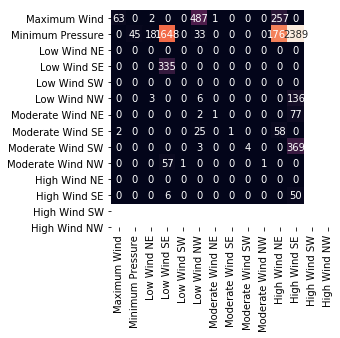

In [42]:
labels = gnb.predict(test_X)
mat = confusion_matrix(test_y, target_pred)
print(test_y.shape)
print(target_pred.shape)
print(labels.shape)
print(test_X.shape)
print(train_X.shape)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=prediction_var, yticklabels=prediction_var)
#matplotlib.xlabel('true label')
matplotlib.pyplot.show()

In [43]:
#matplotlib('predicted label')
gnb = GaussianNB()
mnb = MultinomialNB()
y_pred_gnb = gnb.fit(train_X, train_y).predict(test_X)
#target_pred = y_pred_mnb.predict(test_X)
print(accuracy_score(test_y, y_pred_gnb))
cnf_matrix_gnb = confusion_matrix(test_y, y_pred_gnb)
print(cnf_matrix_gnb)
print(metrics.accuracy_score(y_pred_gnb,test_y)) # to check the accuracy

0.06452435603162458
[[  63    0    0    0    0    0    0    2    0    0    0    0]
 [   0   45    0    0    0    0    0    0    0    0    0    0]
 [   2   18    0    0    0    3    0    0    0    0    0    0]
 [   0 1648    0  335    0    0    0    0    0   57    0    6]
 [   0    0    0    0    0    0    0    0    0    1    0    0]
 [ 487   33    0    0    0    6    2   25    3    0    0    0]
 [   1    0    0    0    0    0    1    0    0    0    0    0]
 [   0    0    0    0    0    0    0    1    0    0    0    0]
 [   0    0    0    0    0    0    0    0    4    0    0    0]
 [   0    0    0    0    0    0    0    0    0    1    0    0]
 [ 257 1762    0    0    0    0    0   58    0    0    0    0]
 [   0 2389    0    0    0  136   77    0  369    0    0   50]]
0.06452435603162458


In [44]:
print("Number of mislabeled points out of a total %d points : %d"
%(data.shape[0],(test_y != y_pred_gnb).sum()))

Number of mislabeled points out of a total 26137 points : 7336


In [45]:
print(accuracy_score(test_y, y_pred_gnb))

0.06452435603162458


In [46]:
model = svm.SVC(kernel='linear')
model.fit(train_X,train_y)
#Predict Output
predicted= model.predict(test_X)
print("SVM accuray:",accuracy_score(test_y, predicted))

SVM accuray: 0.9566437133384341
